It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not 
charged for items that they did not purchase.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#to load datase
df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape


(284807, 31)

In [ ]:
#Check null values alongwith heat map
print(df.isnull().sum())
plt.show()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.drop("Time",axis=1,inplace=True)

In [ ]:
X=df.drop("Class",axis=1)
Y=df["Class"]

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [ ]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
pd.Series(Y_train).value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [ ]:
pd.Series(Y_test).value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [ ]:
#first install inbuilt package imblearn
!pip install imblearn

In [ ]:
#use randomoversampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#create obj of RandomOverSampler
ros = RandomOverSampler(random_state=1)

In [ ]:
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [ ]:
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [ ]:
pd.Series(Y_test_ros).value_counts()

0    85295
1    85295
Name: Class, dtype: int64

In [ ]:
X.shape

(284807, 29)

In [ ]:
#create a neural network
#create a nerual network (NN)
import tensorflow as tf
#create object of squential class 
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(64,activation="relu",input_shape=(X.shape[1],)),
                           #hidden layer1
                           tf.keras.layers.Dense(64,activation="relu"),   #hidden layers2
                           tf.keras.layers.Dense(1,activation="sigmoid")  #output layer
                           ])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [26]:
trained_model=model.fit(X_train_ros,Y_train_ros,epochs=100,batch_size=32,validation_data=(X_test_ros,Y_test_ros))


Epoch 1/100
12439/12439 [==============================] - 35s 3ms/step - loss: 6.0932e-04 - accuracy: 0.9999 - val_loss: 3.0342 - val_accuracy: 0.9225
Epoch 2/100
12439/12439 [==============================] - 33s 3ms/step - loss: 7.4214e-04 - accuracy: 0.9999 - val_loss: 2.7694 - val_accuracy: 0.9325
Epoch 3/100
12439/12439 [==============================] - 29s 2ms/step - loss: 5.9847e-04 - accuracy: 0.9999 - val_loss: 2.8106 - val_accuracy: 0.9325
Epoch 4/100
12439/12439 [==============================] - 34s 3ms/step - loss: 6.8048e-04 - accuracy: 0.9999 - val_loss: 3.3167 - val_accuracy: 0.9257
Epoch 5/100
12439/12439 [==============================] - 34s 3ms/step - loss: 7.3409e-04 - accuracy: 0.9998 - val_loss: 3.3297 - val_accuracy: 0.9324
Epoch 6/100
12439/12439 [==============================] - 33s 3ms/step - loss: 4.5093e-04 - accuracy: 0.9999 - val_loss: 3.2703 - val_accuracy: 0.9325
Epoch 7/100
12439/12439 [==============================] - 29s 2ms/step - loss: 3.9248e-

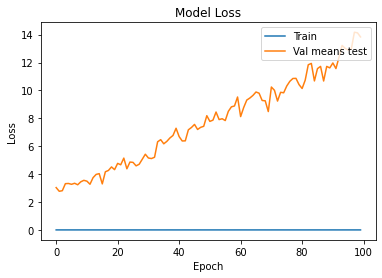

In [27]:
#visualization training error and testing
plt.plot(trained_model.history["loss"])  #training's loss meams error
plt.plot(trained_model.history["val_loss"])  #testing's loss means error
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val means test'],loc='upper right')  #loc means loacation

plt.show()

In [28]:
#check the loss and score on training time
model.evaluate(X_train_ros,Y_train_ros)

12439/12439 [==============================] - 25s 2ms/step - loss: 7.4222e-05 - accuracy: 1.0000


[7.422242197208107e-05, 0.999989926815033]

In [29]:
#check the loss and score on training time
model.evaluate(X_test_ros,Y_test_ros)

5331/5331 [==============================] - 7s 1ms/step - loss: 13.8364 - accuracy: 0.9190


[13.836418151855469, 0.9189929366111755]

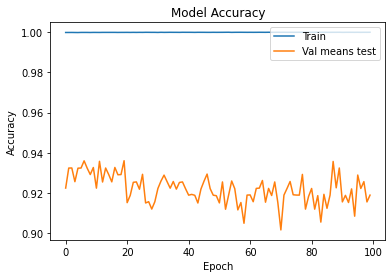

In [30]:
#visualization training score and testing score
plt.plot(trained_model.history["accuracy"])  #training's loss meams error
plt.plot(trained_model.history["val_accuracy"])  #testing's loss means error
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val means test'],loc='upper right')  #loc means loacation

plt.show()

In [31]:
#here model is overfit, to reduced overfit situation thn apply regularisation
#means to add external error on traing time
#here training score>testing score(model is overfit)
#create a nerual network (NN) after adding error(regularisation)
from keras import regularizers
#create object of squential class 
model1=tf.keras.Sequential([
                           tf.keras.layers.Dense(64,activation="relu",
                                                 kernel_regularizer=regularizers.l2(0.01),
                                                 input_shape=(X.shape[1],)),
                           #hidden layer1
                           tf.keras.layers.Dense(64,activation="relu",
                                                 kernel_regularizer=regularizers.l2(0.01)),
                            #hidden layers2
                           tf.keras.layers.Dense(1,activation="sigmoid",
                                                kernel_regularizer=regularizers.l2(0.01))  #output layer
                           ])

In [32]:
model1.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [33]:
trained_model1=model1.fit(X_train_ros,Y_train_ros,epochs=100,batch_size=32,
                          validation_data=(X_test_ros,Y_test_ros))

Epoch 1/100
12439/12439 [==============================] - 37s 3ms/step - loss: 0.2023 - accuracy: 0.9476 - val_loss: 0.1896 - val_accuracy: 0.9491
Epoch 2/100
12439/12439 [==============================] - 30s 2ms/step - loss: 0.1856 - accuracy: 0.9478 - val_loss: 0.1881 - val_accuracy: 0.9475
Epoch 3/100
12439/12439 [==============================] - 34s 3ms/step - loss: 0.1852 - accuracy: 0.9478 - val_loss: 0.1859 - val_accuracy: 0.9488
Epoch 4/100
12439/12439 [==============================] - 30s 2ms/step - loss: 0.1849 - accuracy: 0.9480 - val_loss: 0.1873 - val_accuracy: 0.9509
Epoch 5/100
12439/12439 [==============================] - 29s 2ms/step - loss: 0.1847 - accuracy: 0.9481 - val_loss: 0.1837 - val_accuracy: 0.9501
Epoch 6/100
12439/12439 [==============================] - 32s 3ms/step - loss: 0.1846 - accuracy: 0.9482 - val_loss: 0.1869 - val_accuracy: 0.9514
Epoch 7/100
12439/12439 [==============================] - 34s 3ms/step - loss: 0.1845 - accuracy: 0.9484 - val_

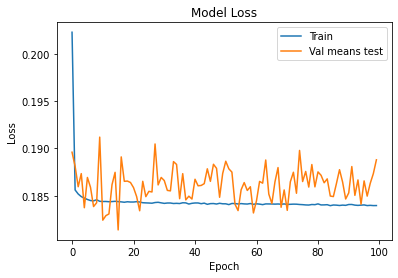

In [34]:
#visualization training error and testing
plt.plot(trained_model1.history["loss"])  #training's loss meams error
plt.plot(trained_model1.history["val_loss"])  #testing's loss means error
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val means test'],loc='upper right')  #loc means loacation

plt.show()

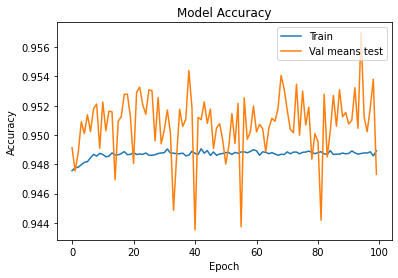

In [35]:
#visualization training score and testing score
plt.plot(trained_model1.history["accuracy"])  #training's loss meams error
plt.plot(trained_model1.history["val_accuracy"])  #testing's loss means error
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val means test'],loc='upper right')  #loc means loacation

plt.show()

In [36]:
#find predication
Y_pred=model1.predict(X_test_ros)

In [37]:
Y_pred=np.where(Y_pred>0.5,1,0)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_ros,Y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85295
           1       0.97      0.92      0.95     85295

    accuracy                           0.95    170590
   macro avg       0.95      0.95      0.95    170590
weighted avg       0.95      0.95      0.95    170590

